## GE AVIATION ATOMIC RISKS ANALYSIS FOR BOTH TP/HIGH & NOTABLE ALERTS

In [ ]:
#Importing All the necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import tree
import graphviz
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE

In [3]:
#Import datasets
indicator_data = pd.read_csv('F:/Data Analytics-MS!/Integrated Experiential Learn/Week 5 & 6/indicator_pairs_data updated.csv')
employee_data = pd.read_csv('F:/Data Analytics-MS!/Integrated Experiential Learn/Week 5 & 6/obfuscated_demo_data2.csv')

In [4]:
#Merging indicators and obfuscated employee data to cluster and model better
merged_data = pd.merge(indicator_data, employee_data, on='employee_id', how = 'inner')

In [5]:
#Restricting to only atomic alerts
condition = merged_data['alert_category']=='Atomic'
merged_data = merged_data[condition]

In [6]:
#Checking for null values
print(merged_data.isnull().sum())

alert_escalation_date       0
alert_id_fk                 0
insert_date                 0
score                       0
owner_name                105
employee_id                 0
risk_factor                 0
avg_score                   0
classification              0
hru                         0
alert_category              0
alert_type                  0
indicator_pairs             0
person_type                 0
person_status               0
ge_hire_date             1121
city                     1324
state_name                738
country_name              738
function_group            738
job_function                0
career_band                 0
industry_focus_name         0
dtype: int64


In [7]:
#Creating a Tenure column and dropping the unnecessary columns

merged_data['Dates'] = pd.to_datetime(merged_data['ge_hire_date']).dt.date
merged_data['Time'] = pd.to_datetime(merged_data['ge_hire_date']).dt.time
merged_data['year'] = pd.DatetimeIndex(merged_data['Dates']).year
merged_data['Tenure'] = merged_data.apply(lambda row: 2020 - row.year, axis = 1) 
merged_data['year'] = merged_data['year'].fillna(0).astype(int)
merged_data['Tenure'] = merged_data['Tenure'].fillna(0).astype(int)

merged_data = merged_data.drop(['alert_id_fk', 'insert_date', 'employee_id', 'score', 'alert_escalation_date', 'ge_hire_date', 'city', 'state_name', 'country_name', 'alert_type', 'alert_category', 'risk_factor', 'avg_score', 'year', 'Time', 'Dates'], axis=1)

In [8]:
#Splitting Indicator Pairs column into multiple columns using delimiter '/'
merged_data[['indicator_pairs', 'indicator_pairs1', 'indicator_pairs2', 'indicator_pairs3', 'indicator_pairs4', 'indicator_pairs5', 'indicator_pairs6', 'indicator_pairs7', 'indicator_pairs8']] = merged_data.indicator_pairs.str.split("/",expand=True)

In [9]:
#Creating duplicate dataframes to work on HIGH and Notable Risks Separately
High_Atomic_Alerts = merged_data.copy()
Notable_Atomic_Alerts = merged_data.copy()
#Duplicating Dataframes for Random Forest Models (RFM) of High & Notable Atomic Risks
High_Atomic_RFM = merged_data.copy()
Notable_Atomic_RFM = merged_data.copy()

### CLUSTERING HIGH ATOMIC RISKS

In [10]:
#Performing one-hot encoding for clustering High Atomic Alerts and altering target variable accordingly
High_Atomic_Alerts['classification'] = np.where((High_Atomic_Alerts['classification'] == 'TP/HIGH'), 1, 0)
High_Atomic_Alerts = pd.get_dummies(High_Atomic_Alerts)

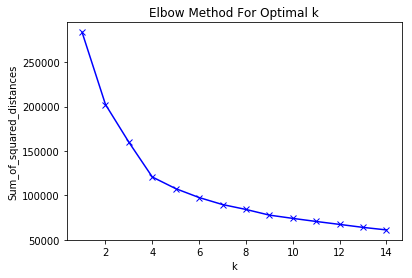

In [11]:
#Plotting Elbow Plot
mms = MinMaxScaler()
mms.fit(High_Atomic_Alerts)
data_transformed = mms.transform(High_Atomic_Alerts)

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [12]:
#K-Means Clustering for High Atomic Alerts
kmeans = KMeans(n_clusters=4, random_state=0).fit(data_transformed)
labels = kmeans.labels_

High_Atomic_Alerts['clusters'] = labels

kmeans_mean_cluster = pd.DataFrame(round(High_Atomic_Alerts.groupby('clusters').mean(),1))
kmeans_mean_cluster

,classification,Tenure,owner_name_Analyst_1,owner_name_Analyst_4,owner_name_Analyst_5,owner_name_Analyst_6,owner_name_Analyst_7,owner_name_Analyst_8,owner_name_Senior_Analyst_1,owner_name_Senior_Analyst_2,...,indicator_pairs2_App_25_Atomic_TT_IND,indicator_pairs2_App_9_Atomic_DVD_Burn_IND,indicator_pairs2_Threshold_Heat_Email_IND,indicator_pairs3_App_27_Heat_USB_IND,indicator_pairs3_Threshold_Heat_Print_IND,indicator_pairs4_App_9_Heat_USB_IND,indicator_pairs5_Threshold_Heat_BA_IND,indicator_pairs6_Threshold_Heat_Email_IND,indicator_pairs7_Top_Users_Heat_Egress_IND,indicator_pairs8_Top_Users_Heat_USB_IND
clusters,,,,,,,,,,,,,,,,,,,,,
0,0.0,7.3,0.1,0.3,0.0,0.2,0.0,0.0,0.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,12.1,0.1,0.4,0.0,0.1,0.1,0.1,0.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,14.7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### RANDOM FOREST MODEL FOR HIGH ATOMIC RISKS

In [14]:
#Performing Random Forest Modeling for High Atomic Alerts
feature_cols = ['owner_name', 'hru', 'person_type', 'person_status', 'Tenure', 'function_group', 'career_band', 'job_function', 'industry_focus_name', 'indicator_pairs', 'indicator_pairs1', 'indicator_pairs2', 'indicator_pairs3', 'indicator_pairs4', 'indicator_pairs5', 'indicator_pairs6', 'indicator_pairs7', 'indicator_pairs8']
High_Atomic_RFM['classification'] = np.where((High_Atomic_RFM['classification'] == 'TP/HIGH'), 1, 0)
X1 = High_Atomic_RFM[feature_cols] # Features
y1 = High_Atomic_RFM.classification #Target Variable

#One-hot Encoding
X1 = pd.get_dummies(X1)

#Splitting into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.25,random_state=0)

#Training the Algorithm
classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#Threshold = 0.5
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[23076    14]
 [   41    18]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     23090
          1       0.56      0.31      0.40        59

avg / total       1.00      1.00      1.00     23149

0.997624087434


In [17]:
#Altering Thresholds to find a Cost-Effective model 

threshold = 0.25

predicted_proba = classifier.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

accuracy = accuracy_score(y_test, predicted)
print(accuracy)

print(confusion_matrix(y_test,predicted))

0.998012873126
[[23058    32]
 [   14    45]]


In [18]:
#Altering Thresholds to find a Cost-Effective model 

threshold = 0.167

predicted_proba = classifier.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

accuracy = accuracy_score(y_test, predicted)
print(accuracy)

print(confusion_matrix(y_test,predicted))

0.997840079485
[[23053    37]
 [   13    46]]


In [19]:
#Altering Thresholds to find a Cost-Effective model 

threshold = 0.023

predicted_proba = classifier.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

accuracy = accuracy_score(y_test, predicted)
print(accuracy)

print(confusion_matrix(y_test,predicted))

0.996112143073
[[23009    81]
 [    9    50]]


In [20]:
#Altering Thresholds to find a Cost-Effective model 

threshold = 0.001

predicted_proba = classifier.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

accuracy = accuracy_score(y_test, predicted)
print(accuracy)

print(confusion_matrix(y_test,predicted))

0.995204976457
[[22986   104]
 [    7    52]]


### CLUSTERING NOTABLE ATOMIC RISKS

In [21]:
#Performing one-hot encoding for clustering Notable Atomic Alerts and altering target variable accordingly
Notable_Atomic_Alerts['classification'] = np.where(((Notable_Atomic_Alerts['classification'] == 'TP/HIGH') | (Notable_Atomic_Alerts['classification'] == 'TP/LOW')), 1, 0)
Notable_Atomic_Alerts = pd.get_dummies(Notable_Atomic_Alerts)

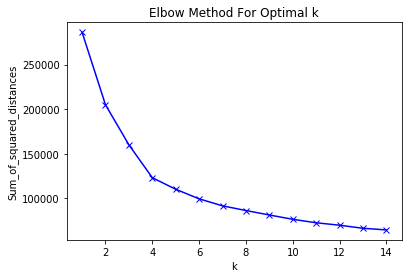

In [22]:
#Plotting Elbow Plot
mms2 = MinMaxScaler()
mms2.fit(Notable_Atomic_Alerts)
data_transformed2 = mms2.transform(Notable_Atomic_Alerts)

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed2)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [23]:
#K-Means Clustering for Notable Atomic Alerts
kmeans = KMeans(n_clusters=4, random_state=0).fit(data_transformed2)
labels = kmeans.labels_

Notable_Atomic_Alerts['clusters'] = labels

kmeans_mean_cluster = pd.DataFrame(round(Notable_Atomic_Alerts.groupby('clusters').mean(),1))
kmeans_mean_cluster

,classification,Tenure,owner_name_Analyst_1,owner_name_Analyst_4,owner_name_Analyst_5,owner_name_Analyst_6,owner_name_Analyst_7,owner_name_Analyst_8,owner_name_Senior_Analyst_1,owner_name_Senior_Analyst_2,...,indicator_pairs2_App_25_Atomic_TT_IND,indicator_pairs2_App_9_Atomic_DVD_Burn_IND,indicator_pairs2_Threshold_Heat_Email_IND,indicator_pairs3_App_27_Heat_USB_IND,indicator_pairs3_Threshold_Heat_Print_IND,indicator_pairs4_App_9_Heat_USB_IND,indicator_pairs5_Threshold_Heat_BA_IND,indicator_pairs6_Threshold_Heat_Email_IND,indicator_pairs7_Top_Users_Heat_Egress_IND,indicator_pairs8_Top_Users_Heat_USB_IND
clusters,,,,,,,,,,,,,,,,,,,,,
0,0.0,7.3,0.1,0.3,0.0,0.2,0.0,0.0,0.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.1,12.1,0.1,0.4,0.0,0.1,0.1,0.1,0.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,14.7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### RANDOM FOREST MODEL FOR NOTABLE ATOMIC RISKS

In [24]:
#Performing Random Forest Modeling for Notable Atomic Alerts
#split dataset in features and target variable
feature_cols = ['owner_name', 'hru', 'person_type', 'person_status', 'Tenure', 'function_group', 'career_band', 'job_function', 'industry_focus_name', 'indicator_pairs', 'indicator_pairs1', 'indicator_pairs2', 'indicator_pairs3', 'indicator_pairs4', 'indicator_pairs5', 'indicator_pairs6', 'indicator_pairs7', 'indicator_pairs8']
Notable_Atomic_RFM['classification'] = np.where(((Notable_Atomic_RFM['classification'] == 'TP/HIGH') | (Notable_Atomic_RFM['classification'] == 'TP/LOW')), 1, 0)
X2 = Notable_Atomic_RFM[feature_cols] # Features
y2 = Notable_Atomic_RFM.classification #Target Variable

#One-hot Encoding
X2 = pd.get_dummies(X2)

#Splitting into training and testing sets
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2,test_size=0.25,random_state=0)

#Training the Algorithm
classifier2 = RandomForestClassifier(n_estimators=20, random_state=0)
classifier2.fit(X_train2, y_train2)
y_pred2 = classifier2.predict(X_test2)

#Threshold = 0.5
print(confusion_matrix(y_test2,y_pred2))
print(classification_report(y_test2,y_pred2))
print(accuracy_score(y_test2, y_pred2))

[[22253   207]
 [  226   463]]
             precision    recall  f1-score   support

          0       0.99      0.99      0.99     22460
          1       0.69      0.67      0.68       689

avg / total       0.98      0.98      0.98     23149

0.981295088341


In [27]:
#Altering Thresholds to find a Cost-Effective model 

threshold = 0.25

predicted_proba = classifier2.predict_proba(X_test2)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

accuracy = accuracy_score(y_test2, predicted)
print(accuracy)

print(confusion_matrix(y_test2,predicted))

0.981035897879
[[22106   354]
 [   85   604]]


In [28]:
#Altering Thresholds to find a Cost-Effective model 

threshold = 0.167

predicted_proba = classifier2.predict_proba(X_test2)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

accuracy = accuracy_score(y_test2, predicted)
print(accuracy)

print(confusion_matrix(y_test2,predicted))

0.970884271459
[[21821   639]
 [   35   654]]


In [29]:
#Altering Thresholds to find a Cost-Effective model 

threshold = 0.023

predicted_proba = classifier2.predict_proba(X_test2)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

accuracy = accuracy_score(y_test2, predicted)
print(accuracy)

print(confusion_matrix(y_test2,predicted))

0.95947989114
[[21538   922]
 [   16   673]]


In [30]:
#Altering Thresholds to find a Cost-Effective model 

threshold = 0.001

predicted_proba = classifier2.predict_proba(X_test2)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

accuracy = accuracy_score(y_test2, predicted)
print(accuracy)

print(confusion_matrix(y_test2,predicted))

0.958356732472
[[21510   950]
 [   14   675]]
